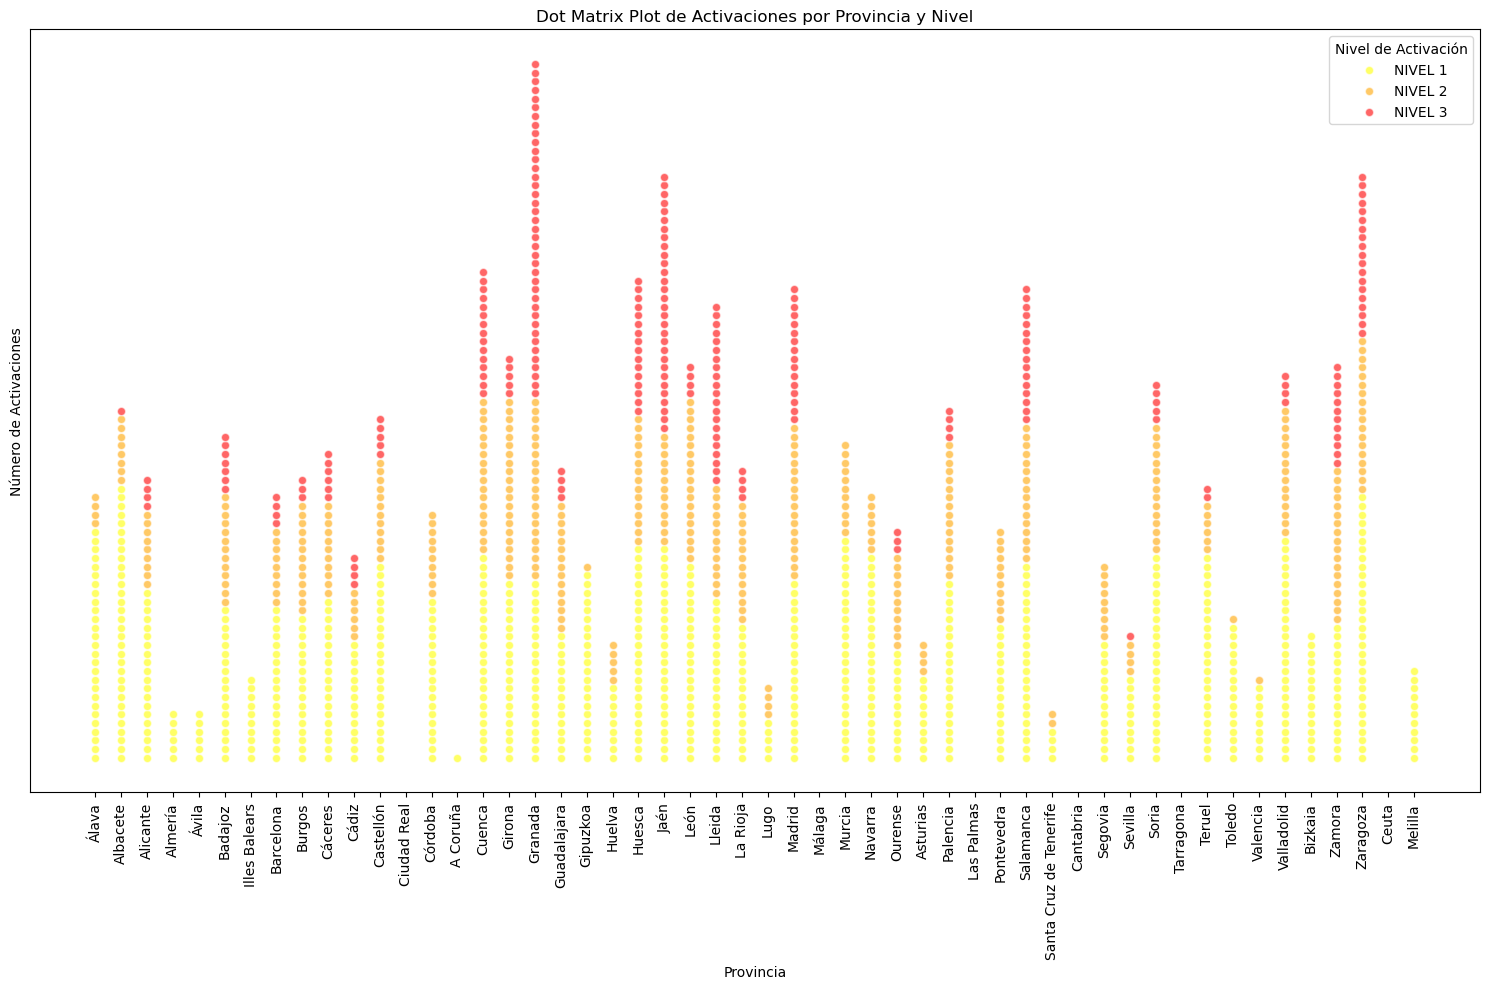

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargado los datos desde un archivo CSV
file_path = 'Activaciones_niveles_Plan_Nacional_Temperaturas_Estivales_2022.csv'  # Asegúrate de que la ruta al archivo sea correcta
data_matrix_plot = pd.read_csv(file_path, delimiter=';')

# Se  llenan los valores faltantes en "NIVEL 3" con ceros y asegurarse de que todos los valores sean enteros
data_matrix_plot['NIVEL 3'] = data_matrix_plot['NIVEL 3'].fillna(0).astype(int)

# Se preparan los datos para el "dot matrix plot"
provincias = data_matrix_plot['Capital de Provincia']
niveles = ['NIVEL 1', 'NIVEL 2', 'NIVEL 3']
colors = ['yellow', 'orange', 'red']

# Se inicializa la figura y el eje para la visualización
fig, ax = plt.subplots(figsize=(15, 10))

# Se generan los puntos para cada provincia y nivel
for i, provincia in enumerate(provincias):
    y_offset = 0  # Iniciar el offset vertical para los puntos
    for nivel, color in zip(niveles, colors):
        num_activations = int(data_matrix_plot.loc[data_matrix_plot['Capital de Provincia'] == provincia, nivel])
        x = [i] * num_activations  # Mismas coordenadas x para los puntos del mismo nivel y provincia
        y = list(range(y_offset, y_offset + num_activations))  # Coordenadas y para los puntos
        ax.scatter(x, y, color=color, label=nivel if y_offset == 0 else "", alpha=0.6, edgecolors='w')
        y_offset += num_activations  # Incrementar el offset vertical para el próximo nivel

# Se ajusta la presentación del gráfico
ax.set_xticks(range(len(provincias)))
ax.set_xticklabels(provincias, rotation=90)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('Provincia')
ax.set_ylabel('Número de Activaciones')
ax.set_title('Dot Matrix Plot de Activaciones por Provincia y Nivel')

# Se añade una leyenda y evitar entradas duplicadas
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), title='Nivel de Activación')

# Se ajusta el layout y mostrar el gráfico
plt.tight_layout()
plt.show()


